In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# os.getcwd()
df = pd.read_csv("../datasets/athlete_events.csv")
df.head()

NameError: name 'pd' is not defined

In [3]:
df.drop('Games',axis=1,inplace=True) #Removing irrelavent feature

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 29.0+ MB


In [5]:
df['Sex'] = df['Sex'].map({'M':1,'F':0}) #1 -> M, 0 -> F
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,1,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,1,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
df['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [8]:
df['Team'].nunique()
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
df.shape

(271116, 14)

In [10]:
df.dropna(axis=0,inplace=True) # Dropping all NaN values for now.

In [11]:
df.shape

(30181, 14)

In [12]:
df = df.iloc[0:int(30181 * 80 / 100)]  #Getting 80 percent values for analysis

In [13]:
df.describe()

,ID,Sex,Age,Height,Weight,Year
count,24144.000000,24144.000000,24144.000000,24144.000000,24144.000000,24144.000000
mean,56887.401922,0.664927,25.432695,177.751035,73.896620,1987.773774
std,31353.997502,0.472026,5.064447,10.868027,15.007488,22.832669
min,16.000000,0.000000,13.000000,136.000000,30.000000,1896.000000
25%,30655.500000,0.000000,22.000000,170.000000,63.000000,1976.000000
50%,57803.000000,1.000000,25.000000,178.000000,73.000000,1992.000000
75%,83678.500000,1.000000,28.000000,185.000000,83.000000,2006.000000
max,110701.000000,1.000000,66.000000,223.000000,175.000000,2016.000000


array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'Sex'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Weight'}>,
        <AxesSubplot: title={'center': 'Year'}>]], dtype=object)

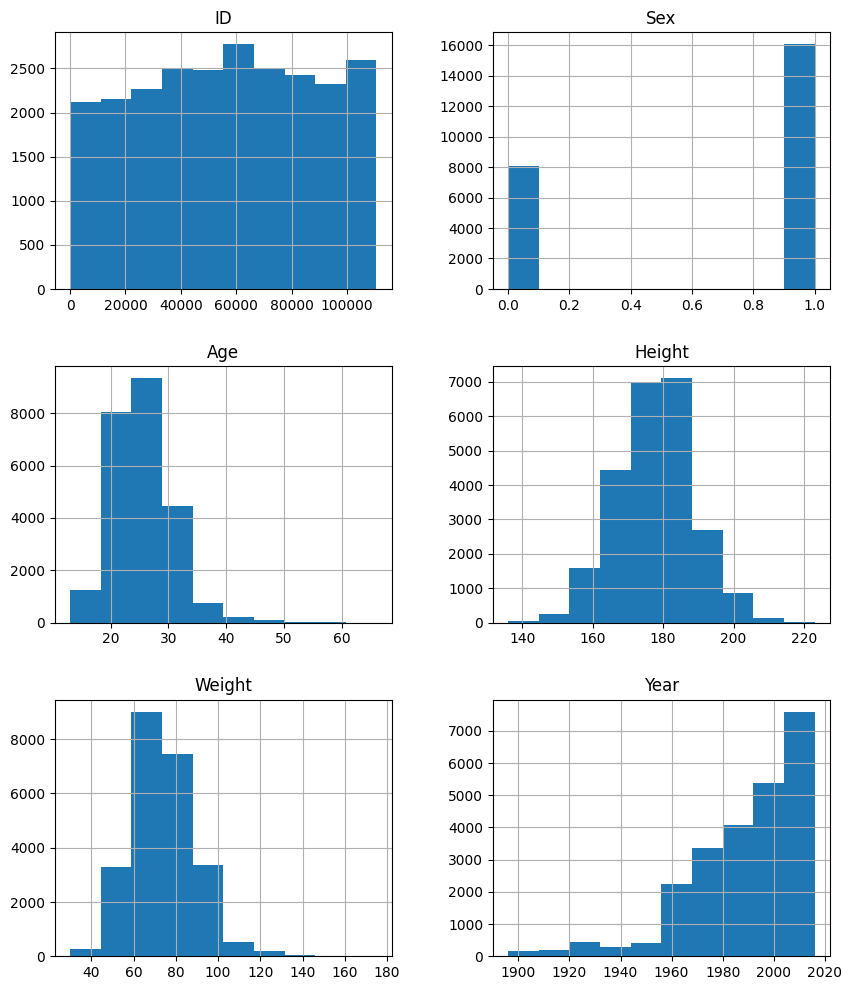

In [14]:
df.hist(figsize=(10,12))

In [15]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,1,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [16]:
df.sort_values(by=['Medal','Team'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
171761,86313,Rohullah Nikpai,1,21.0,183.0,63.0,Afghanistan,AFG,2008,Summer,Beijing,Taekwondo,Taekwondo Men's Flyweight,Bronze
171762,86313,Rohullah Nikpai,1,25.0,183.0,63.0,Afghanistan,AFG,2012,Summer,London,Taekwondo,Taekwondo Men's Featherweight,Bronze
4891,2794,Mohamed Allalou,1,26.0,174.0,63.0,Algeria,ALG,2000,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Bronze
12530,6815,Mohamed Bahari,1,20.0,180.0,75.0,Algeria,ALG,1996,Summer,Atlanta,Boxing,Boxing Men's Middleweight,Bronze
87967,44596,Soraya Haddad,0,23.0,155.0,52.0,Algeria,ALG,2008,Summer,Beijing,Judo,Judo Women's Half-Lightweight,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152176,76386,Samuel Matete,1,27.0,183.0,81.0,Zambia,ZAM,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Silver
45641,23549,Kirsty Leigh Coventry (-Seward),0,20.0,176.0,64.0,Zimbabwe,ZIM,2004,Summer,Athina,Swimming,Swimming Women's 100 metres Backstroke,Silver
45644,23549,Kirsty Leigh Coventry (-Seward),0,24.0,176.0,64.0,Zimbabwe,ZIM,2008,Summer,Beijing,Swimming,Swimming Women's 100 metres Backstroke,Silver
45646,23549,Kirsty Leigh Coventry (-Seward),0,24.0,176.0,64.0,Zimbabwe,ZIM,2008,Summer,Beijing,Swimming,Swimming Women's 200 metres Individual Medley,Silver


In [17]:
print(df['Medal'].value_counts(normalize=True),end = "\n\n")
print(df['Team'].value_counts(normalize=True))

Bronze    0.336605
Gold      0.336523
Silver    0.326872
Name: Medal, dtype: float64

United States        0.147242
Soviet Union         0.072896
Germany              0.049370
Australia            0.039803
France               0.036199
                       ...   
Kyrgyzstan           0.000041
Moseley Wanderers    0.000041
Guatemala            0.000041
Jest                 0.000041
Kathleen             0.000041
Name: Team, Length: 246, dtype: float64


In [18]:
df[df['Medal']=='Gold']['Team'].value_counts() 

United States           1702
Soviet Union             772
Germany                  396
East Germany             305
Canada                   286
                        ... 
Grenada                    1
London City Police-1       1
Cote d'Ivoire              1
United Arab Emirates       1
Syria                      1
Name: Team, Length: 148, dtype: int64

In [19]:
df[df['Medal']=='Silver']['Team'].value_counts() 

United States    1070
Soviet Union      498
Germany           369
Australia         325
Italy             292
                 ... 
Bahrain             1
Cyprus              1
Poland-1            1
Haiti               1
Austria-2           1
Name: Team, Length: 176, dtype: int64

In [20]:
df[df['Medal']=='Bronze']['Team'].value_counts() 

United States    783
Soviet Union     490
Germany          427
Australia        379
France           331
                ... 
Clearwater         1
Bahrain            1
Macedonia          1
Cote d'Ivoire      1
Togo               1
Name: Team, Length: 166, dtype: int64

In [21]:
# plt.hist(df['Event'])
events = df['Event'].value_counts()
list(events).sort
events

Ice Hockey Men's Ice Hockey                819
Football Men's Football                    643
Hockey Men's Hockey                        556
Basketball Men's Basketball                509
Water Polo Men's Water Polo                472
                                          ... 
Athletics Men's All-Around Championship      1
Swimming Men's 100 yard Freestyle            1
Art Competitions Mixed Literature            1
Swimming Men's 50 yard Freestyle             1
Equestrianism Men's Dressage, Team           1
Name: Event, Length: 555, dtype: int64

In [22]:
events_medals = df.iloc[:,-2:]
events_medals.groupby(by=['Event']).describe()

Medal                    
                                               count unique     top freq
Event                                                                   
Alpine Skiing Men's Combined                      23      3  Bronze    9
Alpine Skiing Men's Downhill                      32      3  Silver   11
Alpine Skiing Men's Giant Slalom                  29      3  Silver   12
Alpine Skiing Men's Slalom                        30      3  Silver   11
Alpine Skiing Men's Super G                       19      3  Silver    7
...                                              ...    ...     ...  ...
Wrestling Women's Flyweight, Freestyle             9      3  Bronze    4
Wrestling Women's Heavyweight, Freestyle           6      2  Bronze    4
Wrestling Women's Light-Heavyweight, Freestyle     2      2    Gold    1
Wrestling Women's Lightweight, Freestyle           7      2  Bronze    6
Wrestling Women's Middleweight, Freestyle         13      3  Bronze    5

[555 rows x 4 columns]

<AxesSubplot: xlabel='Event', ylabel='count'>

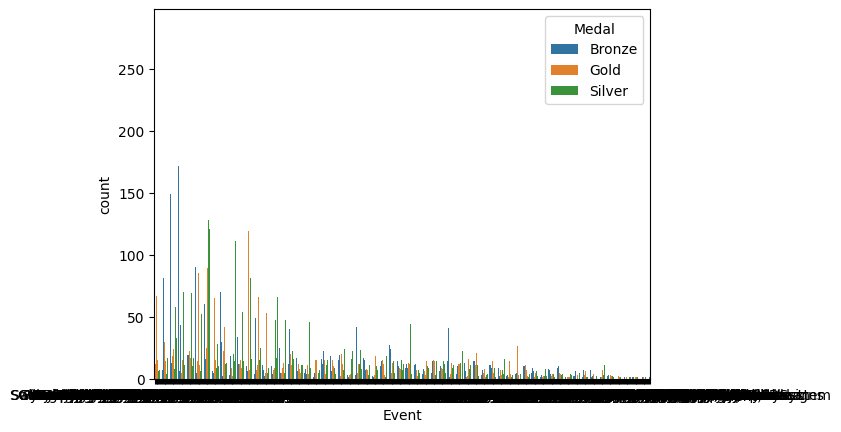

In [23]:
sns.countplot(data = events_medals, x="Event", hue="Medal")

In [24]:
team_event_medals = df[['Team','Event','Medal']]
team_event_medals

,Team,Event,Medal
40,Finland,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Gymnastics Men's Individual All-Around,Bronze
42,Finland,Gymnastics Men's Team All-Around,Gold
44,Finland,Gymnastics Men's Horse Vault,Gold
48,Finland,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...
220364,Romania,Boxing Men's Welterweight,Bronze
220365,Romania,Boxing Men's Light-Middleweight,Silver
220387,Romania,"Canoeing Men's Canadian Doubles, 1,000 metres",Silver
220388,Romania,"Canoeing Men's Canadian Doubles, 1,000 metres",Gold


In [25]:
team_event_medals.groupby(by=['Team','Medal']).describe()

Event         \
                                    count unique   
Team                         Medal                 
Afghanistan                  Bronze     2      2   
Algeria                      Bronze     5      5   
                             Gold       4      2   
                             Silver     4      4   
Amateur Athletic Association Gold       1      1   
...                                   ...    ...   
Yugoslavia                   Silver    89     20   
Zambia                       Silver     1      1   
Zimbabwe                     Bronze     1      1   
                             Gold      14      2   
                             Silver     4      3   

                                                                                    \
                                                                               top   
Team                         Medal                                                   
Afghanistan                  Bronze                      Taekwondo Men's Flyweight   
Algeria                      Bronze                Boxing Men's Light-Welterweight   
                             Gold                   Athletics Women's 1,500 metres   
                             Silver                        Judo Men's Middleweight   
Amateur Athletic Association Gold               Athletics Men's 5,000 metres, Team   
...                                                                            ...   
Yugoslavia                   Silver                    Basketball Men's Basketball   
Zambia                       Silver             Athletics Men's 400 metres Hurdles   
Zimbabwe                     Bronze  Swimming Women's 200 metres Individual Medley   
                             Gold                            Hockey Women's Hockey   
                             Silver         Swimming Women's 100 metres Backstroke   

                                          
                                    freq  
Team                         Medal        
Afghanistan                  Bronze    1  
Algeria                      Bronze    1  
                             Gold      2  
                             Silver    1  
Amateur Athletic Association Gold      1  
...                                  ...  
Yugoslavia                   Silver   27  
Zambia                       Silver    1  
Zimbabwe                     Bronze    1  
                             Gold     12  
                             Silver    2  

[490 rows x 4 columns]

In [26]:
team_event = df[['Team','Event']]
# team_event.groupby(by=['Team']).describe()
team_event.sort_values(['Team'],ascending=False).groupby('Team').value_counts()

# Particualr team participated in particualr event in n times

Team         Event                                        
Afghanistan  Taekwondo Men's Featherweight                     1
             Taekwondo Men's Flyweight                         1
Algeria      Athletics Men's 1,500 metres                      3
             Athletics Women's 1,500 metres                    2
             Athletics Men's 800 metres                        2
                                                              ..
Zimbabwe     Hockey Women's Hockey                            12
             Swimming Women's 100 metres Backstroke            2
             Swimming Women's 200 metres Backstroke            2
             Swimming Women's 200 metres Individual Medley     2
             Swimming Women's 400 metres Individual Medley     1
Length: 5421, dtype: int64

In [27]:
df['City'].unique() #These are the places where the competition hosted

array(['Sochi', 'London', 'Helsinki', 'Albertville', 'Lillehammer',
       'Salt Lake City', 'Torino', 'Atlanta', 'Rio de Janeiro', 'Beijing',
       'Sydney', 'Athina', 'Moskva', 'Los Angeles', 'Barcelona', 'Seoul',
       'Roma', 'Tokyo', 'Munich', 'Chamonix', 'Stockholm', 'Paris',
       'Antwerpen', 'Calgary', 'Grenoble', 'Montreal', 'Vancouver',
       'Melbourne', 'Sapporo', 'Lake Placid', 'Sarajevo', 'Mexico City',
       'Nagano', 'Squaw Valley', 'Berlin', 'Amsterdam', 'Innsbruck',
       'Garmisch-Partenkirchen', "Cortina d'Ampezzo", 'St. Louis', 'Oslo',
       'Sankt Moritz'], dtype=object)

In [28]:
id_medal_count = df[['ID','Name','Sex','Age','Sport','Medal']]
id_medal_count.sort_values(by=['Age','Medal']).groupby(by=['Sport','Medal','Sex']).value_counts()

Sport          Medal   Sex  ID      Name                          Age 
Alpine Skiing  Bronze  0    91797   Anja Sofia Tess Prson         24.0    2
                            41849   Elisabeth Grgl                28.0    2
                            93155   Karen Lynne Percy (-Lowe)     21.0    2
                            63127   Isolde Kostner (-Perathoner)  18.0    2
                            12524   Fernande Bochatay (-Frank)    22.0    1
                                                                         ..
Wrestling      Silver  1    514     Ara Abrahamian                29.0    1
                            357     Yusup Abdusalomov             30.0    1
                            339     Namiq Yadulla Abdullayev      25.0    1
                            84      Stephen Anthony Abas          26.0    1
                            109062  Torul sgrov                   23.0    1
Length: 22929, dtype: int64

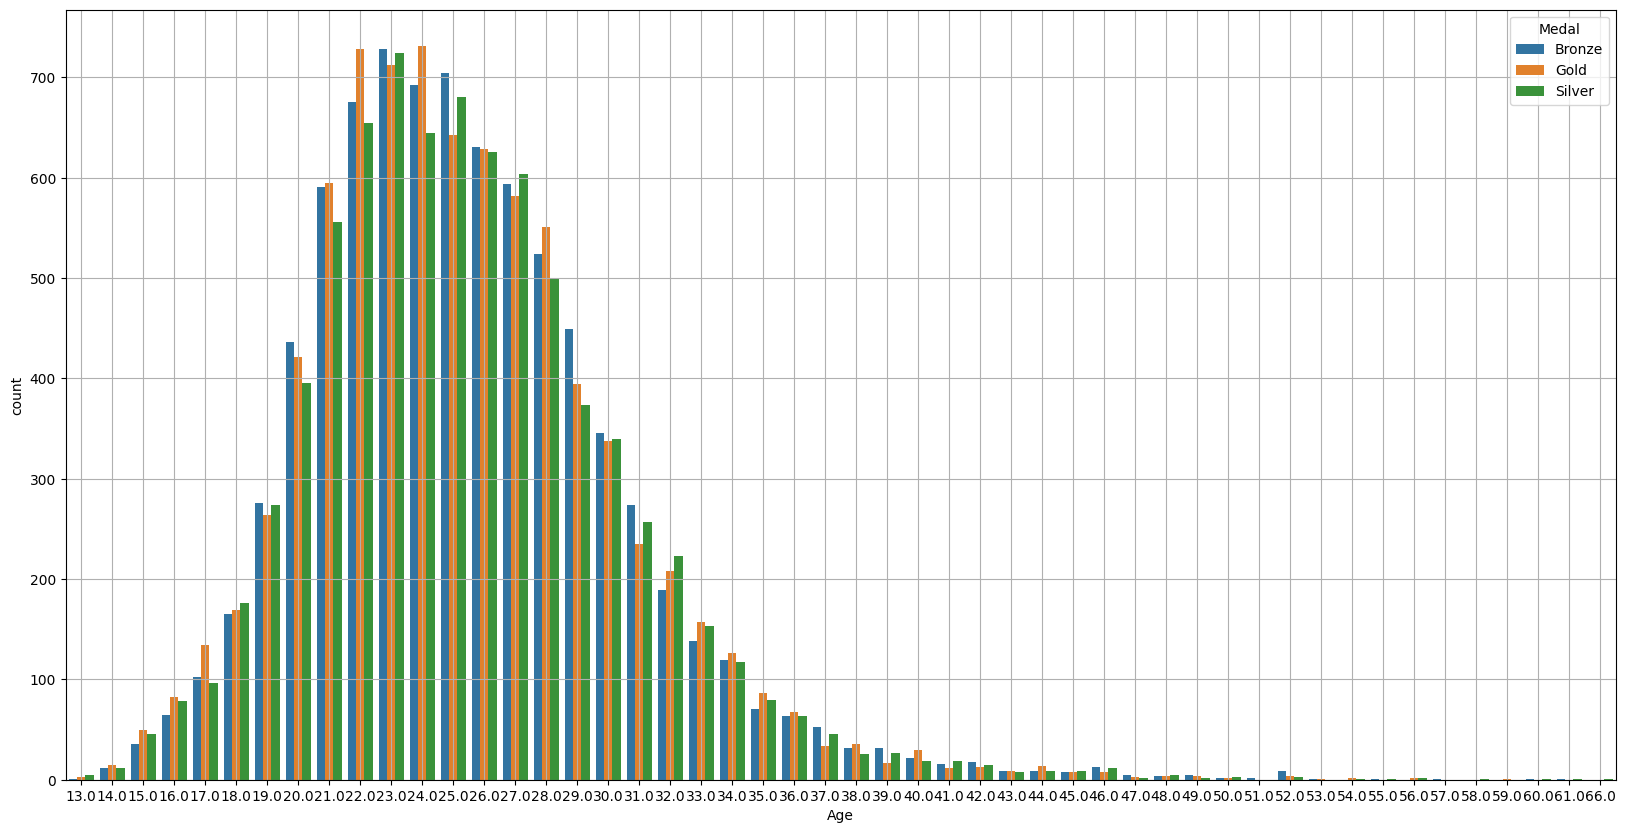

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Age',hue='Medal')
plt.grid() #Age around 24 has highest medals

Total number of Medals received by Males: 16054
And percentage Male won medals : 66.49271040424122


Males won Gold medals : 5450
Males won Silver medals : 5199
Males won Bronze medals : 5405



Total number of Medals received by Females: 8090
And percentage Female won medals : 33.507289595758785


Females won Gold medals : 2675
Females won Silver medals : 2693
Females won Bronze medals : 2722


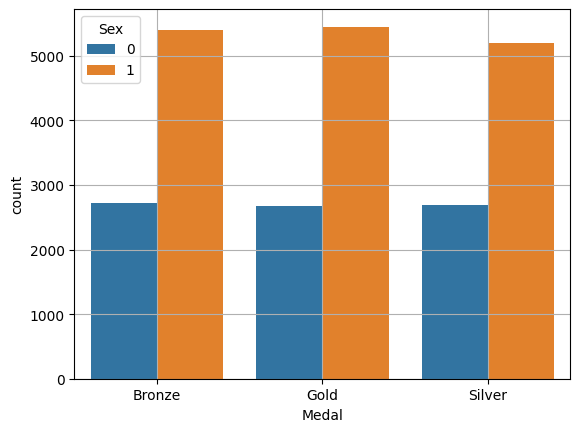

In [30]:
sns.countplot(data=df, x='Medal',hue='Sex')
plt.grid()
print(f"Total number of Medals received by Males: {df[df['Sex']==1].shape[0]}\nAnd percentage Male won medals : {df[df['Sex']==1].shape[0]/df['Sex'].shape[0] * 100}")
print("\n")

print(f"Males won Gold medals : {df[(df['Sex']==1) & (df['Medal']=='Gold')].shape[0]}")
print(f"Males won Silver medals : {df[(df['Sex']==1) & (df['Medal']=='Silver')].shape[0]}")
print(f"Males won Bronze medals : {df[(df['Sex']==1) & (df['Medal']=='Bronze')].shape[0]}")


print("\n\n")
print(f"Total number of Medals received by Females: {df[df['Sex']==0].shape[0]}\nAnd percentage Female won medals : {df[df['Sex']==0].shape[0]/df['Sex'].shape[0] * 100}")
print("\n")

print(f"Females won Gold medals : {df[(df['Sex']==0) & (df['Medal']=='Gold')].shape[0]}")
print(f"Females won Silver medals : {df[(df['Sex']==0) & (df['Medal']=='Silver')].shape[0]}")
print(f"Females won Bronze medals : {df[(df['Sex']==0) & (df['Medal']=='Bronze')].shape[0]}")

In [31]:
name_df = df[['Name','Team','Sport','Year','Medal']]
name_df.sort_values(by="Year").groupby(by=["Name","Sport",'Medal']).head(10)

,Name,Team,Sport,Year,Medal
32334,"Thomas Edmund ""Tom"" Burke",United States,Athletics,1896,Gold
76562,"Robert ""Bob"" Garrett",United States,Athletics,1896,Silver
76563,"Robert ""Bob"" Garrett",United States,Athletics,1896,Silver
76564,"Robert ""Bob"" Garrett",United States,Athletics,1896,Gold
76565,"Robert ""Bob"" Garrett",United States,Athletics,1896,Gold
...,...,...,...,...,...
111298,Henri Junghnel,Germany,Shooting,2016,Gold
111874,Pavlos Kagialis,Greece,Sailing,2016,Bronze
112292,Nikola Kalini,Serbia,Basketball,2016,Silver
110913,Emma Aastrand Jrgensen,Denmark,Canoeing,2016,Silver


Total number of medals in each year :-
Year
2016    1605
2008    1587
2004    1554
2012    1551
2000    1532
Name: Medal, dtype: int64


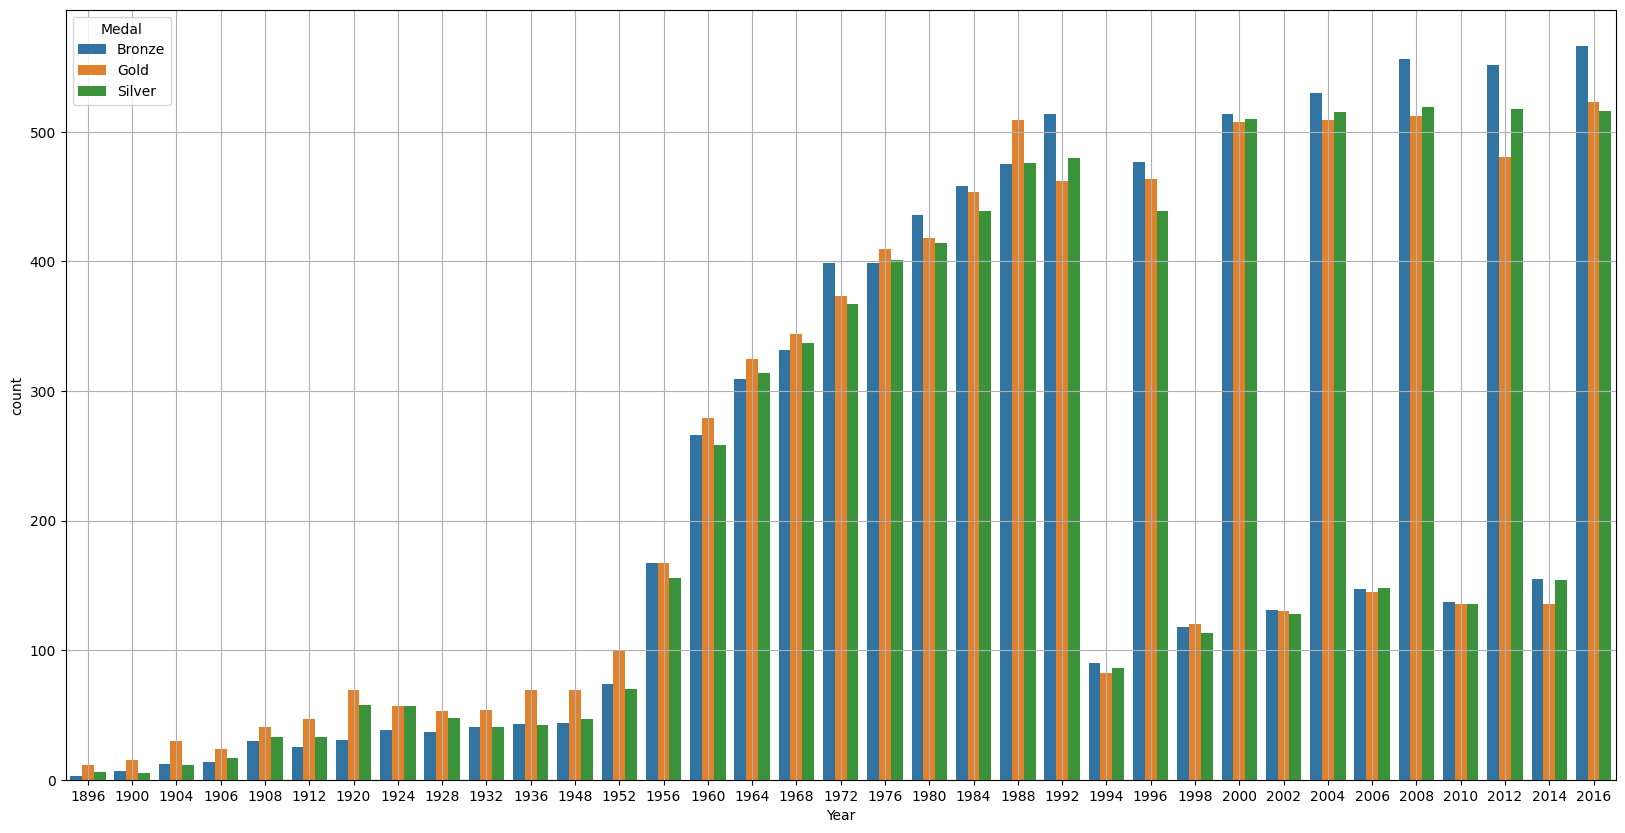

In [32]:
plt.figure(figsize=(20,10))

a = df.sort_values(by="Year").groupby(by=['Year'])
print("Total number of medals in each year :-")
print(a.Medal.count().sort_values(ascending=False).head())

sns.countplot(data=name_df,x="Year",hue="Medal")
plt.grid()

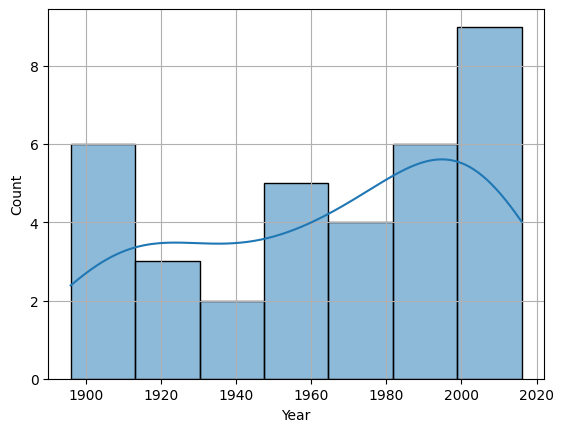

In [44]:
a = df.sort_values(by="Year").groupby(by=['Year'])
a = a.Medal.count()
a
sns.histplot(data=a,x="Year",kde=True) #It shows with increasing year, Number of medals also increases.
plt.grid()

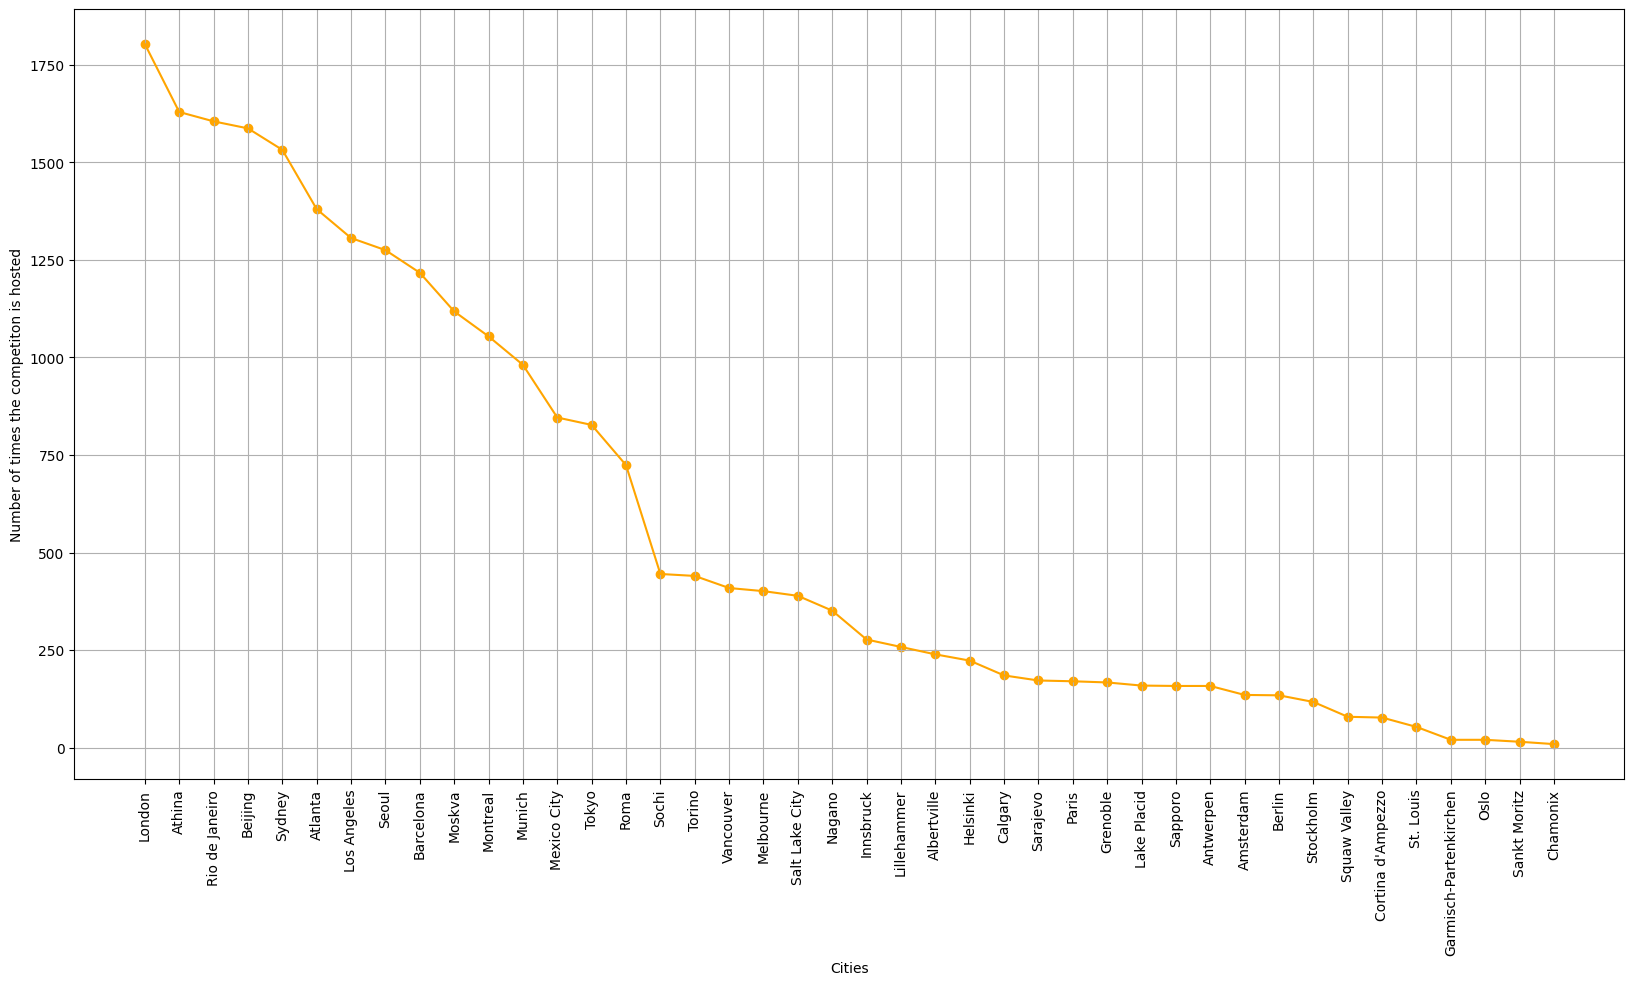

In [73]:
plt.figure(figsize=(20,10))
df['City'].value_counts()
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("Number of times the competiton is hosted")
plt.plot(df['City'].value_counts(),color="orange") #In which City how many times the competition in hosted
plt.scatter(df['City'].value_counts().index,df['City'].value_counts(),color="orange")
plt.grid()